### __0. Prepare__

In [ ]:
##시험 전 준비
#(1) 가상환경 생성: conda create -n py3
#(2) 스파이더 설치: conda install spyder
#(3) 스파이더 설정: run selection → alt + enter
#(4) 라이브러리 설치: np, pd, plt, sns, sm, plotly 등

##라이브러리 로드
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#pio.renderers.default = 'browser'

##데이터 불러오기
#mtcars
mtcars = sm.datasets.get_rdataset('mtcars', 'datasets')
mtcars_dat = mtcars.data.copy()
#states
states = sm.datasets.get_rdataset('usa_states', 'stevedata')
states_dat = states.data.copy()
#iris
iris = sm.datasets.get_rdataset('iris', 'datasets')
iris_dat = iris.data.copy()
#volcano
volcano = sm.datasets.get_rdataset('volcano', 'datasets')
volcano_dat = volcano.data.copy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### __1. Scatter plot__

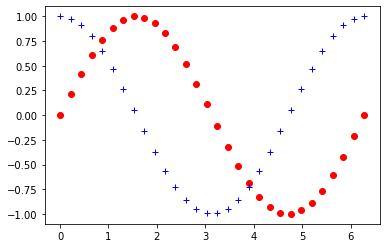

In [ ]:
##plt.plot
x = np.linspace(0, 2*np.pi, 30) 
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, 'ro', x, y2, 'b+')

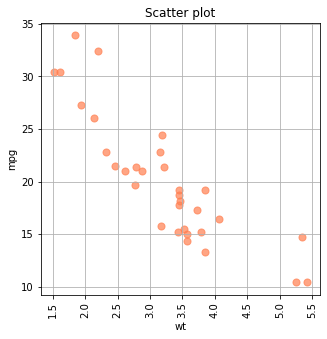

In [ ]:
##plt.scatter
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x=mtcars_dat['wt'],
            y=mtcars_dat['mpg'],
            c='coral',
            s=50,
            alpha=0.7)
plt.title('Scatter plot')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.xticks(rotation=90)
plt.grid(True)

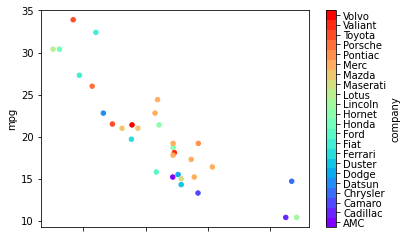

In [ ]:
##df.plot.scatter
mtcars_dat['company'] = [s.split()[0] for s in mtcars_dat.index]
group_dat = mtcars_dat.groupby('company')
mtcars_dat2 = mtcars_dat.copy()
mtcars_dat2['company'] = pd.Categorical(mtcars_dat2['company'])
mtcars_dat2.plot.scatter(x='wt',
                         y='mpg',
                         c='company',
                         cmap='rainbow')

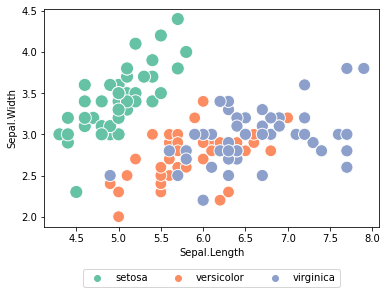

In [ ]:
##sns.scatterplot
sw_mean = iris_dat.groupby('Species')['Sepal.Width'].transform('mean')
sns.scatterplot(x='Sepal.Length',
                y='Sepal.Width',
                hue='Species',
                s=50*sw_mean,
                palette='Set2',
                data=iris_dat)
plt.legend(loc='lower center',
           ncol=3,
           bbox_to_anchor=(.5, -.3))

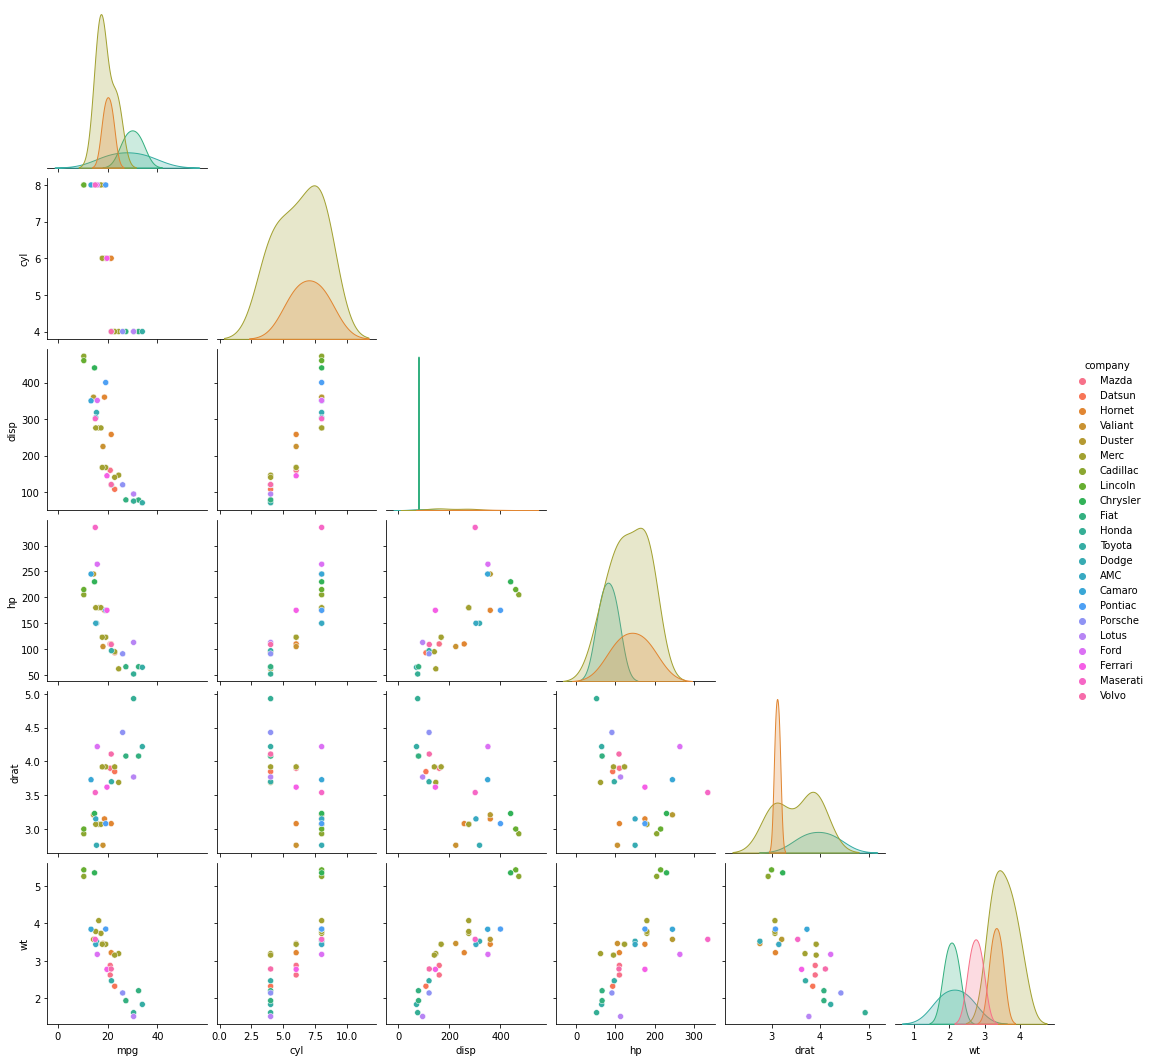

In [ ]:
##sns.pairplot
features = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt']
sns.pairplot(data=mtcars_dat,
             vars=features,
             hue='company',
             diag_kind='kde',
             corner=True)

### __2. Line plot__

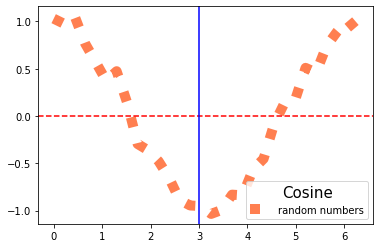

In [ ]:
##plt.plot
x = np.linspace(0, 2*np.pi, 30)
y = np.cos(x)+0.1*np.random.randn(len(x))
plt.plot(x, y,
         linewidth=10,
         linestyle='dotted',
         color='coral',
         label='random numbers')
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axvline(x=3, linestyle='solid', color='blue') 
plt.legend(loc='lower right',
           title='Cosine',
           title_fontsize=15)        

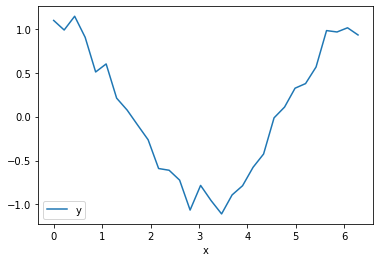

In [ ]:
##df.plot
df = pd.DataFrame({'x':x, 'y':y})
df.plot('x', 'y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



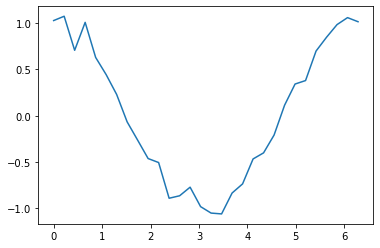

In [ ]:
##sns.lineplot
sns.lineplot(x, y)

### __3. Bar plot__

([<matplotlib.axis.XTick at 0x7f1ff3552fd0>,
 [Text(0, 0, 'SOUTH'),
  Text(0, 0, 'WEST'),
  Text(0, 0, 'NORTH CENTRAL'),
  Text(0, 0, 'NORTHEAST')])

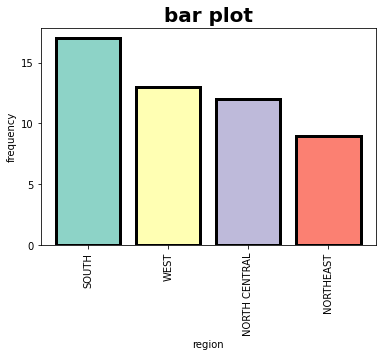

In [ ]:
##plt.bar
count = states_dat.region.value_counts()
color = plt.cm.get_cmap('Set3')(np.arange(count.shape[0]))
plt.bar(x=count.index,
        height=count.values,
        color=color,
        edgecolor='black',
        linewidth=3)
plt.title('bar plot', fontsize=20, fontweight='bold')
plt.xlabel('region')
plt.ylabel('frequency')
plt.yticks([0, 5, 10, 15])
plt.xticks(ticks=range(0, 4),
           labels=[s.upper() for s in count.index],
           rotation=90)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ff32e9850>,
      dtype=object)

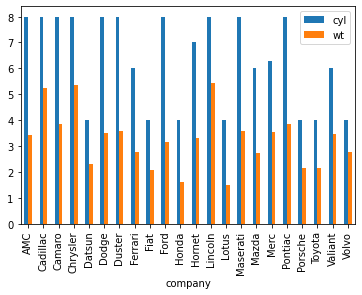

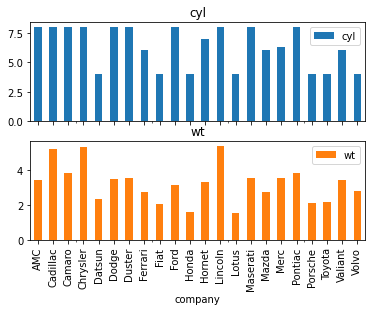

In [ ]:
##df.plot.bar
group_dat = mtcars_dat.groupby('company')[['cyl','wt']].mean()
group_dat.plot.bar(rot=90) #한번에
group_dat.plot.bar(subplots=True, rot=90) #따로따로

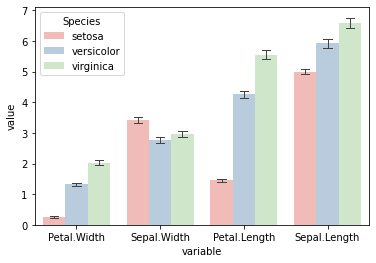

In [ ]:
##sns.barplot
iris_melt = iris_dat.melt(id_vars='Species')
sns.barplot(x='variable',
            y='value',
            hue='Species',
            data=iris_melt,
            palette='Pastel1',
            ci=95,
            capsize=0.1,
            errwidth=1,
            order = ['Petal.Width', 'Sepal.Width',
                     'Petal.Length', 'Sepal.Length'])

### __4. Pie Chart__

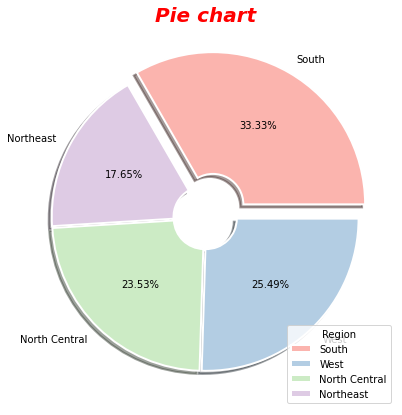

In [ ]:
##plt.pie
count = states_dat.region.value_counts()
color = plt.cm.get_cmap('Pastel1')(np.arange(count.shape[0]))
plt.figure(figsize=(10, 7))
plt.pie(x=count,                         #value_counts() 형태
        labels=count.index,              #label 이름
        autopct='%.2f%%',                #표시형식
        startangle=120,                  #pie 시작각도
        counterclock=False,              #시계방향 순서 여부
        colors=color,                    #pie 색상
        wedgeprops={'width':0.8,         #반지름 보여주는 정도
                    'edgecolor':'w',     #테두리 색상
                    'linewidth' : 2},    #테두리 두께 
        explode=[0.1, 0.01, 0.01, 0.01], #부채꼴에서 튀어나온 정도
        shadow=True)                     #그림자 유무
plt.title('Pie chart',
          color='red',
          fontsize=20,
          fontweight='bold',
          fontstyle='oblique')
plt.legend(loc='lower right',
           title='Region')

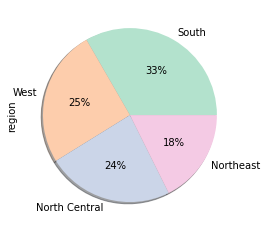

In [ ]:
##df.plot.pie
count = states_dat.region.value_counts()
color = plt.cm.get_cmap('Pastel2')(np.arange(count.shape[0]))
count.plot.pie(colors=color,
               autopct='%.f%%',
               shadow=True)

### __5. Box plot__

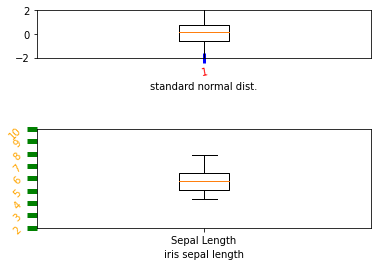

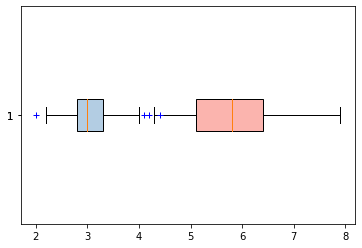

In [ ]:
##plt.boxplot
#그래프 따로따로 
x = np.random.randn(100)
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(212)
ax1.boxplot(x=x)
ax2.boxplot(x=iris_dat['Sepal.Length'],
            labels=['Sepal Length'],
            sym='r*',
            vert=True)
ax1.set_xlabel('standard normal dist.')
ax2.set_xlabel('iris sepal length')
ax1.set_ylim(-2, 2)
ax2.set_ylim(2, 10)
ax1.set_xticks(ticks=[1])
ax1.tick_params(axis='x',
                color='blue',
                labelcolor='red',
                length=10,
                width=3,
                direction='inout',
                rotation=10)
ax2.set_yticks(ticks=[2,3,4,5,6,7,8,9,10])
ax2.tick_params(axis='y',
                color='green',
                labelcolor='orange',
                length=10,
                width=5,
                direction='out',
                rotation=45)

#그래프 한번에
fig = plt.figure()
ax = fig.add_subplot(111)
box1 = ax.boxplot(x=iris_dat['Sepal.Length'],
                 #labels=['Sepal.Length'],
                  vert=False,
                  sym='r*',
                  patch_artist=True)
box2 = ax.boxplot(x=iris_dat['Sepal.Width'],
                 #labels=['Sepal.Width'],
                  vert=False,
                  sym='b+',
                  patch_artist=True)
box = [box1, box2]
color = plt.cm.get_cmap('Pastel1')(np.arange(2))
for b, c in zip(box, color):
  b['boxes'][0].set_facecolor(c)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ff6dab510>,
      dtype=object)

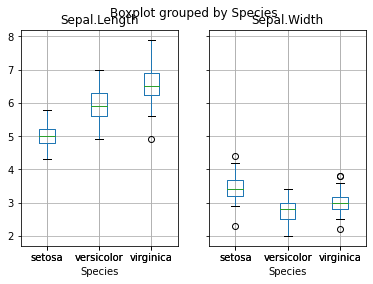

In [ ]:
##df.boxplot
iris_dat.boxplot(column=['Sepal.Length','Sepal.Width'], by='Species')

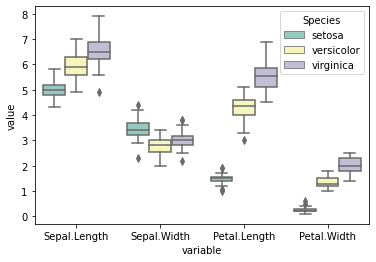

In [ ]:
##sns.boxplot
iris_melt = iris_dat.melt(id_vars='Species')
sns.boxplot(data=iris_melt,
            x='variable',
            y='value',
            hue='Species',
            palette='Set3',
            sym='rs')

### __6. Histogram__

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8 missing from current font.



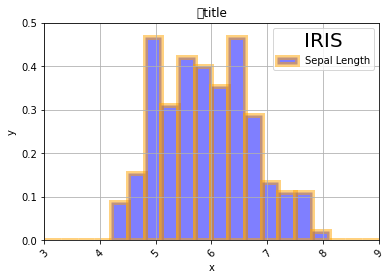

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning:

Unrecognized location 'uppder left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



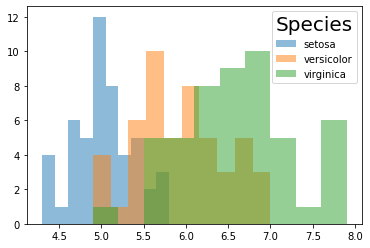

In [ ]:
##plt.hist
#single historam
plt.hist(x=iris_dat['Sepal.Length'],   #변수 1개
         bins=20,                      #구간 수(값이 클수록 얇은 막대)
         #weights
         #rwidth
         range=(3, 9),                 #x축 범위
         density=True,                 #확률질량함수(넓이의 합 1)
         cumulative=False,             #x축 방향으로 축적
         align='mid',                  #막대 중심 위치(mid, left, right)
         orientation='vertical',       #막대 방향(horizontal, vertical)
         alpha=0.5,                    #막대 투명도
         color='blue',                 #막대 색상
         edgecolor='orange',           #테두리 색상
         linewidth=5,                  #테두리 두께
         label='Sepal Length')         #라벨 지정(legend에 표시되는 값)              
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(3, 9)
plt.ylim(0, 0.5)
plt.legend(title='IRIS',
           loc='upper right',
           fontsize=10,
           title_fontsize=20)
plt.grid(True)
plt.show()

#multiple histogram
group_dat = iris_dat.groupby('Species')
keys = group_dat.groups.keys()
for key in keys:
  dat = group_dat.get_group(key)
  plt.hist(x=dat['Sepal.Length'],
           alpha=0.5,
           label=key)
plt.legend(title='Species',
           loc='upper left',
           fontsize=10,
           title_fontsize=20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ffb6e4290>,
      dtype=object)

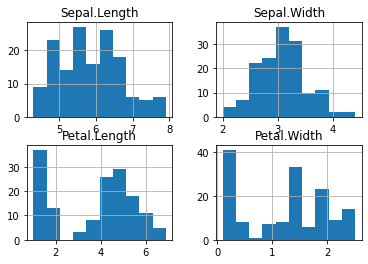

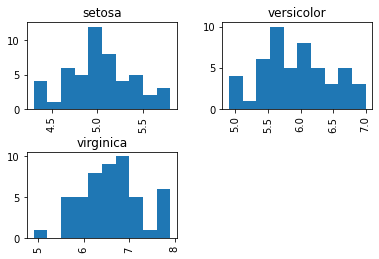

In [ ]:
##df.hist
#x변수별 따로따로 
iris_dat.hist() 

#그룹변수별 따로따로
iris_dat.hist(column='Sepal.Length',
              by='Species')

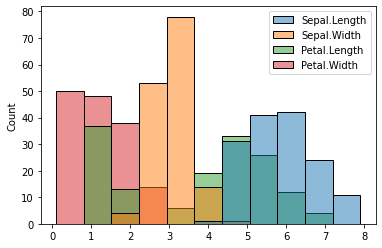

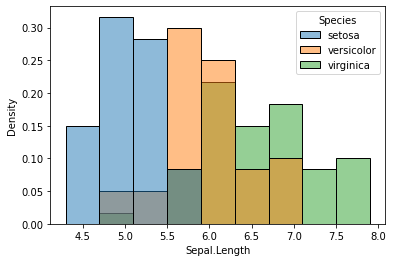

In [ ]:
#sns.histplot
#x변수별 겹쳐서
sns.histplot(data=iris_dat)
plt.show()

#그룹변수별 겹쳐서
sns.histplot(data=iris_dat,
             x='Sepal.Length',
             hue='Species',
             stat='density')

### __7. 3D plot__

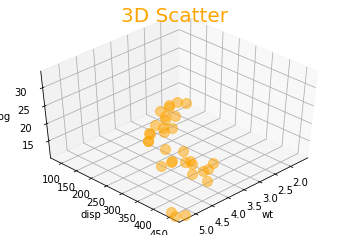

In [ ]:
##3d scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mtcars_dat.wt,
           mtcars_dat.disp,
           #mtcars_dat.mpg,  
           color='orange',   
           s=100,   
           zdir='z',                #고정 축 
           zs=mtcars_dat.mpg.min(), #고정 기준
           depthshade=False,        #원근감
           alpha=0.5)               #투명도
ax.set_xlim([mtcars_dat.wt.min(), mtcars_dat.wt.max()])
ax.set_ylim([mtcars_dat.disp.min(), mtcars_dat.disp.max()])
ax.set_zlim([mtcars_dat.mpg.min(), mtcars_dat.mpg.max()])
ax.set_xlabel('wt')
ax.set_ylabel('disp')
ax.set_zlabel('mpg')
ax.set_title('3D Scatter', color='orange', fontsize=20)
ax.view_init(45, 45) 

Text(0.5, 0.92, '3D Line')

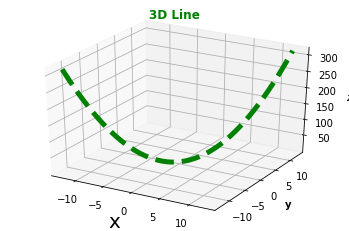

In [ ]:
##3d line
x = np.linspace(-4*np.pi, 4*np.pi, 50)
y = np.linspace(-4*np.pi, 4*np.pi, 50)
z = x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z,
        linewidth=5,
        linestyle='dashed',
        color='green')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontweight='bold')
ax.set_zlabel('z', fontstyle='italic')
ax.set_title('3D Line', color='green', fontweight='bold')

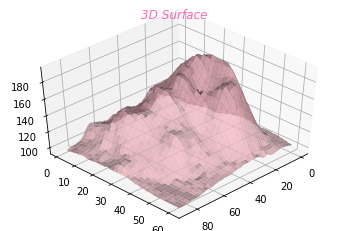

In [ ]:
##3d surface
x = np.arange(1, volcano_dat.shape[0]+1) #행 인덱스
y = np.arange(1, volcano_dat.shape[1]+1) #열 인덱스
xx, yy = np.meshgrid(x, y) #리스트로 좌표 행렬 반환

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx.T, yy.T, volcano_dat.values,
                color='pink',
                alpha=0.8)
ax.set_title('3D Surface', color='hotpink', fontstyle='italic')
ax.view_init(45, 45)

### __8. Interactive plot__

In [ ]:
##Interactive scatter
fig = px.scatter(x='wt',
                 y='mpg', 
                 size='mpg',
                 color='cyl',
                 symbol='cyl',
                 data_frame=mtcars_dat)
fig.show()

In [ ]:
##Interactive line
x = np.linspace(0, 2*np.pi, 30)
y = np.sin(x)
z = ['가']*10 + ['나']*10 + ['다']*10
df = pd.DataFrame({'x':x, 'y':y, 'z': z})
fig = px.line(x='x', 
              y='y', 
              color='z',
              markers=True,
              labels = {'z': 'Type'},
              data_frame=df)
fig.show()

In [ ]:
##Interactive 3d scatter
#px 이용
fig = px.scatter_3d(x='wt',
                    y='disp',
                    z='mpg',
                    color='cyl',
                    symbol='cyl',
                    data_frame=mtcars_dat)
fig.show()

#go 이용
obj = go.Scatter3d(x=mtcars_dat.wt,
                   y=mtcars_dat.disp,
                   z=mtcars_dat.mpg,
                   mode='markers')
fig = go.Figure(data=obj)
fig.show()

In [ ]:
##Interactive 3d line
x = np.linspace(-4*np.pi, 4*np.pi, 50)
y = np.linspace(-4*np.pi, 4*np.pi, 50)
z = x**2 + y**2

#px 이용
fig = px.line_3d(x=x, y=y, z=z)
fig.show()

#go 이용
obj = go.Scatter3d(x=x, y=y, z=z, 
                   mode='lines')
fig = go.Figure(data=obj)
fig.show()

In [ ]:
##Interactive 3d surface
x = 10*np.arange(1, volcano_dat.shape[0]+1)
y = 10*np.arange(1, volcano_dat.shape[1]+1)

#px -> 지원 안함

#go
obj = go.Surface(x=x, y=y, z=volcano_dat.values)
fig = go.Figure(data=obj)
fig.show()

### __9. Game user data__

In [ ]:
##Read Data
def read_fun(folder):
  path = '/content/drive/MyDrive/uos/game_user_data'
  folder = folder
  subfolder = 'game-01'
  filepath = path+'/'+folder+'/'+subfolder
  filelist = os.listdir(filepath)
  res = pd.DataFrame()
  for file in filelist:
    try:
      df = pd.read_csv(filepath+'/'+file+'/data.tsv', sep='\t')
      res = pd.concat([res, df])
    except:
      pass
  return res

df_dau = read_fun('dau')
df_dpu = read_fun('dpu')

In [ ]:
##Merge data
df = df_dau.merge(df_dpu,
                  how='left',
                  on=['log_date', 'app_name', 'user_id'])

In [ ]:
##Preprocess data

#결측값 처리
df.loc[df.payment.isna(), 'payment'] = 0

#총 접속 유저수 
len(df.user_id.unique())

#월별 접속 유저수
df['log_date'] = pd.to_datetime(df['log_date'])
df['month'] = df['log_date'].dt.month
df.groupby('month').user_id.apply(lambda x: len(x.unique()))

#월별 결제액 집계
df.groupby('month').payment.agg(avg=np.mean, max=np.max, min=np.min)

#월별 결제액 정렬
df.sort_values(['month', 'payment'], ascending=[True, False])

#유저별 월별 접속수
df['log_month'] = df.groupby(['month', 'user_id']
                             ).user_id.transform(
                             lambda x: len(x))
    
#유저별 결제액 평균
log_pay = df.groupby('user_id').agg({
          'log_month': lambda x: str(np.where((x>15).all(), 'high',
                                     np.where((x>10).all(), 'mid', 'low'))),
          'payment': 'mean'})

In [ ]:
##Analyze data

#pd.cut: 수치형 변수 구간 나누기
pay_group = pd.cut(log_pay.payment,
                   bins=[0, 50, 100, np.inf],
                   right=False,
                   labels=['low', 'mid', 'high'])
log_pay['pay_group'] = pay_group

#pd.Categorical: 범주형 변수 만들기
log_pay['log_month'] = pd.Categorical(log_pay['log_month'], 
                                      categories=['low', 'mid', 'high'])
log_pay['pay_group'] = pd.Categorical(log_pay['pay_group'], 
                                      categories=['low', 'mid', 'high'])
#pd.crosstab: 범주형 변수 빈도표 생성
ct = pd.crosstab(log_pay['log_month'], log_pay['pay_group'])
display(ct)

#빈도분석
cp = ct.sum(axis=0) / ct.values.sum()   #칼럼별 비율(접속횟수 무시) 
rp = ct.sum(axis=1) / ct.values.sum()   #로우별 비율(접속횟수 무시)
et = ct.values.sum() * np.outer(rp, cp) #기대도수 테이블
display(ct-et)                          #(관측도수)-(기대도수) -> 분산항 필요
display((ct-et)/np.sqrt(et))            #분산항 추가 -> 이제 해석할 여지가 있음 

#카이제곱검정
from scipy.stats import chi2_contingency
chi2_contingency(ct, correction=False)

pay_group,low,mid,high
log_month,,,
low,52863,40,39
mid,1024,6,10
high,900,13,17


pay_group,low,mid,high
log_month,,,
low,41.515552,-16.883341,-24.632212
mid,-13.632576,4.882576,8.750000
high,-27.882976,12.000765,15.882212


pay_group,low,mid,high
log_month,,,
low,0.180637,-2.238545,-3.087912
mid,-0.423210,4.618915,7.826238
high,-0.915361,12.005357,15.022118


(467.97290009129813,
 5.649613336829211e-100,
 4,
 array([[5.28214844e+04, 5.68833406e+01, 6.36322115e+01],
        [1.03763258e+03, 1.11742424e+00, 1.25000000e+00],
        [9.27882976e+02, 9.99235140e-01, 1.11778846e+00]]))

group,log_month,high,low,mid
0,low,-0.387103,0.000786,-0.296806
1,mid,7.000000,-0.013138,4.369492
2,high,14.208602,-0.030050,12.009951


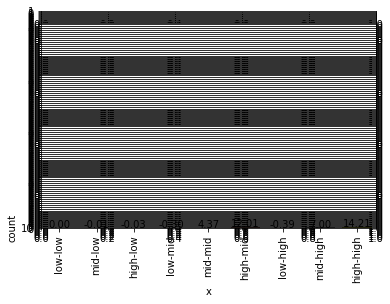

In [ ]:
##Visualize data

#melt: wide -> long 
diff = (ct-et)/et
diff_dat = diff.copy()
diff_dat['log_month'] = diff_dat.index
diff_melt = diff_dat.melt(id_vars='log_month', 
                          value_vars = ['low', 'mid', 'high'],
                          var_name = 'group',
                          value_name = 'count')
diff_melt['x'] = diff_melt.log_month.astype(str)+'-'+diff_melt.group

#sns.barplot: long form 필요
fig, axes = plt.subplots(111)
axes = sns.barplot(x='x', y='count', data=diff_melt)
axes.tick_params(axis='x', labelrotation=90)
for patch in axes.patches:
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_y() + patch.get_height() + 0.5 
    if y>0:
        y += 0.5
    else:
        y -= 1
    axes.text(x, y, 
              s='%.2f' %(patch.get_height()),
              ha='center')
    
#pivot_table: long -> wide 
diff_melt.pivot_table(index='log_month',
                      columns='group',
                      values='count').reset_index(drop=False)